### Implementing HDBSCAN to cluster spending habits of accounts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN, DBSCAN
import seaborn as sns

In [28]:
spending_data = pd.read_csv('C:/Users/camer/OneDrive/Documents/Data Science MSc/DSMP/Proportional_spending_by_account.csv')
spending_data.head()

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,1000.0,-0.003603,0.115157,-0.013799,-0.026129,-0.038480,0.124927,0.015093,-0.007146,0.012463,-0.009759,-0.051889,-0.021443,0.046869,-0.142262
1,1002.0,0.000903,0.163846,-0.014562,-0.012116,-0.045537,-0.010689,0.020247,-0.007146,0.079114,0.002583,-0.049655,-0.030313,-0.003582,-0.093094
2,1006.0,-0.000618,-0.046949,0.013436,0.059187,-0.047891,0.073030,-0.037343,-0.007146,0.020539,-0.009759,0.158437,-0.027322,-0.003582,-0.144018
3,1018.0,-0.001904,-0.110578,-0.012793,-0.036169,0.132839,-0.063913,0.017895,-0.007146,-0.014876,-0.009759,0.123151,0.077521,-0.000928,-0.093342
4,1053.0,0.003433,-0.034050,-0.014562,-0.031265,0.151357,-0.005674,0.055473,-0.001133,0.024622,-0.009759,-0.046894,0.034151,-0.003582,-0.122116


Splitting the data into features and targets

In [3]:
X = spending_data.drop('Sender account', axis=1, errors='ignore')

#### Performing dimensionality reduction (UMAP, PCA, t-SNE)

(8142, 2)


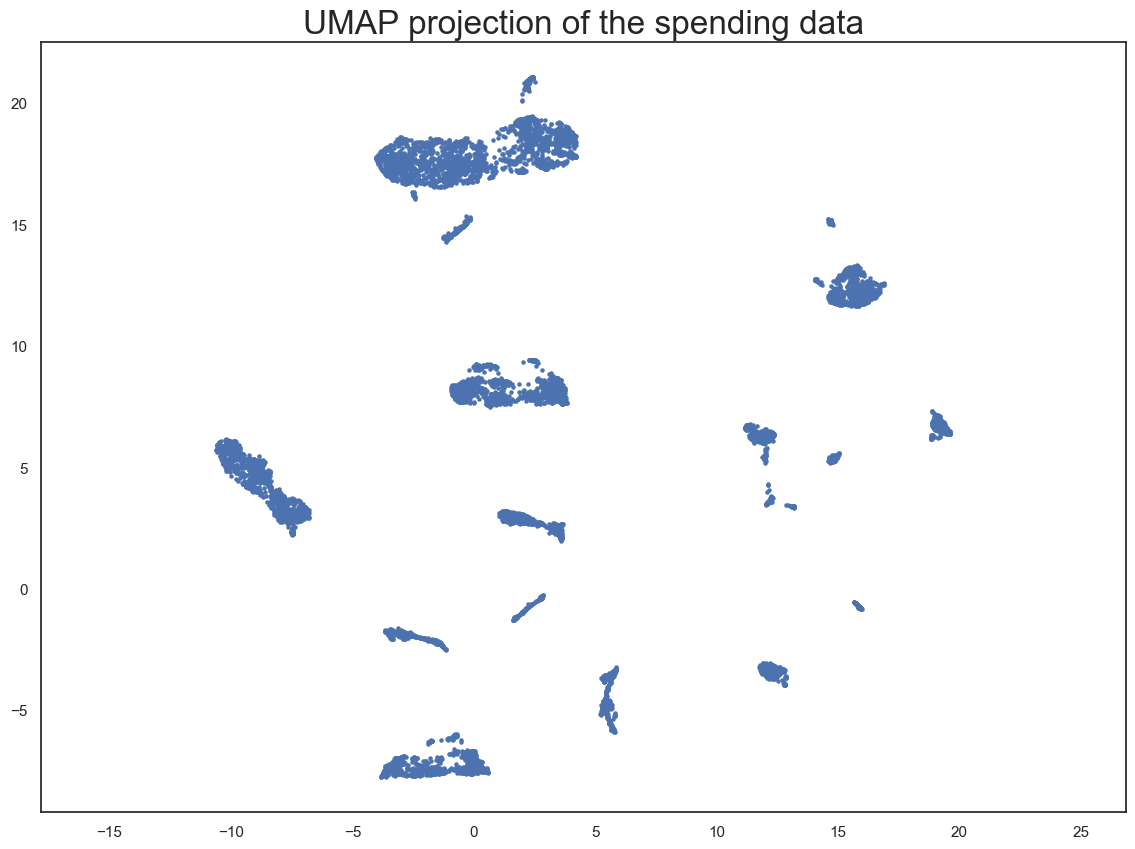

In [4]:
import umap
import matplotlib.pyplot as plt
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

umap_model = umap.UMAP()

spending_umap = umap_model.fit_transform(X)
print(spending_umap.shape)

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the spending data', fontsize=24);

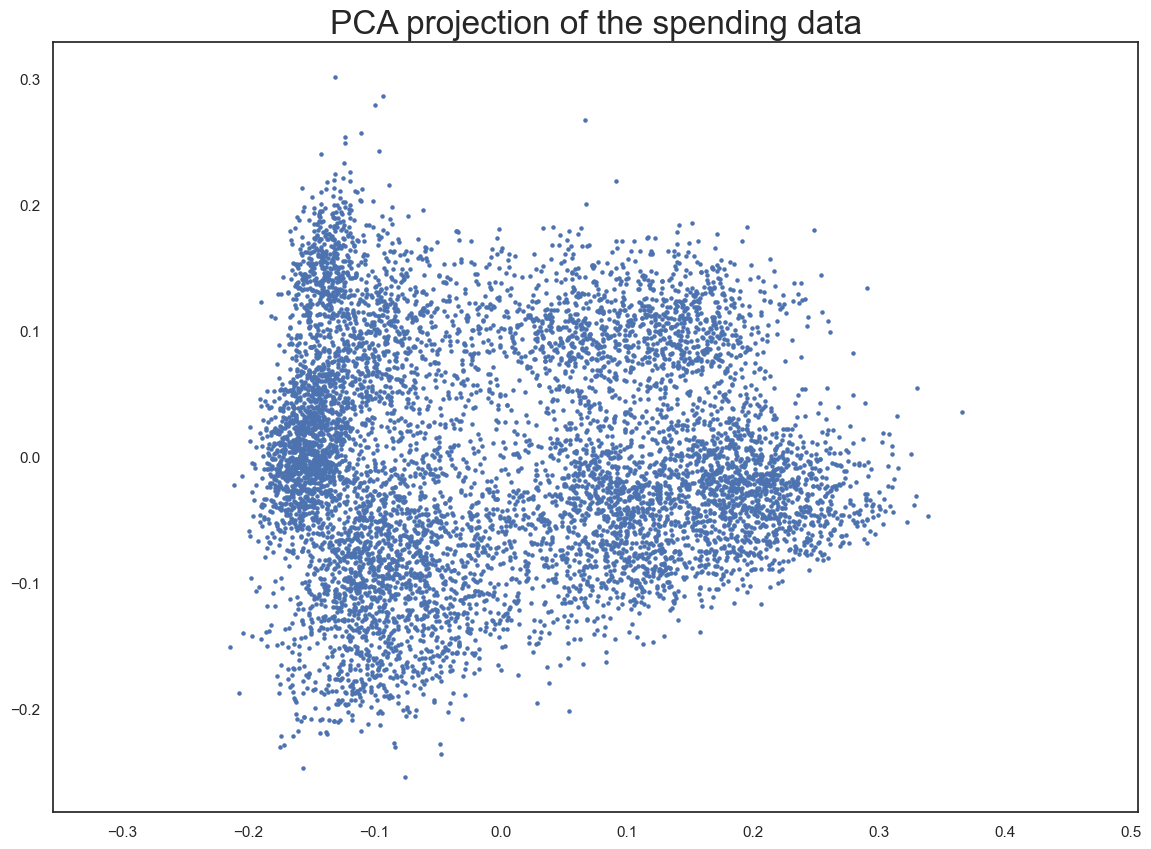

In [5]:
from sklearn.decomposition import PCA
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
pca = PCA()
spending_pca = pca.fit_transform(X)

plt.scatter(
    spending_pca[:, 0],
    spending_pca[:, 1],
        s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the spending data', fontsize=24);

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


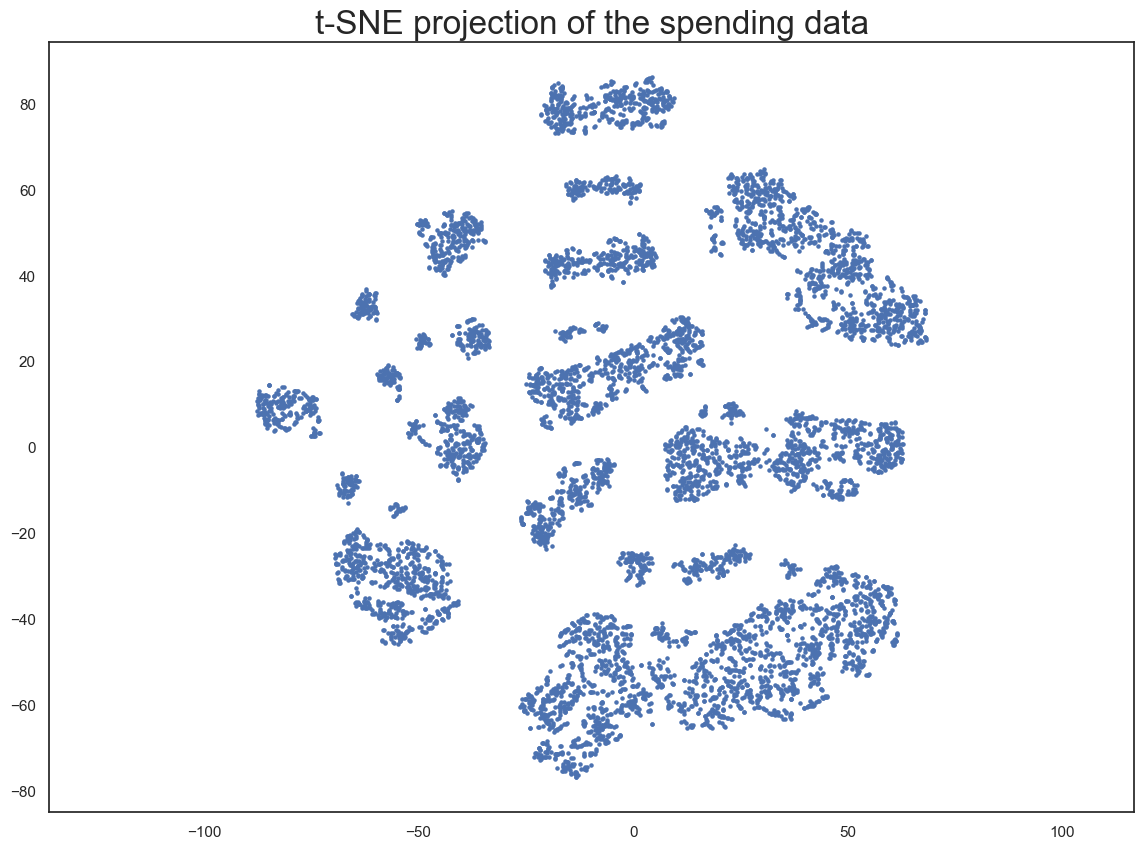

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE()
spending_tsne = tsne.fit_transform(X)

plt.scatter(
    spending_tsne[:, 0],
    spending_tsne[:, 1],
    s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE projection of the spending data', fontsize=24)
plt.show()

#### Clustering with HDBSCAN on data after UMAP 

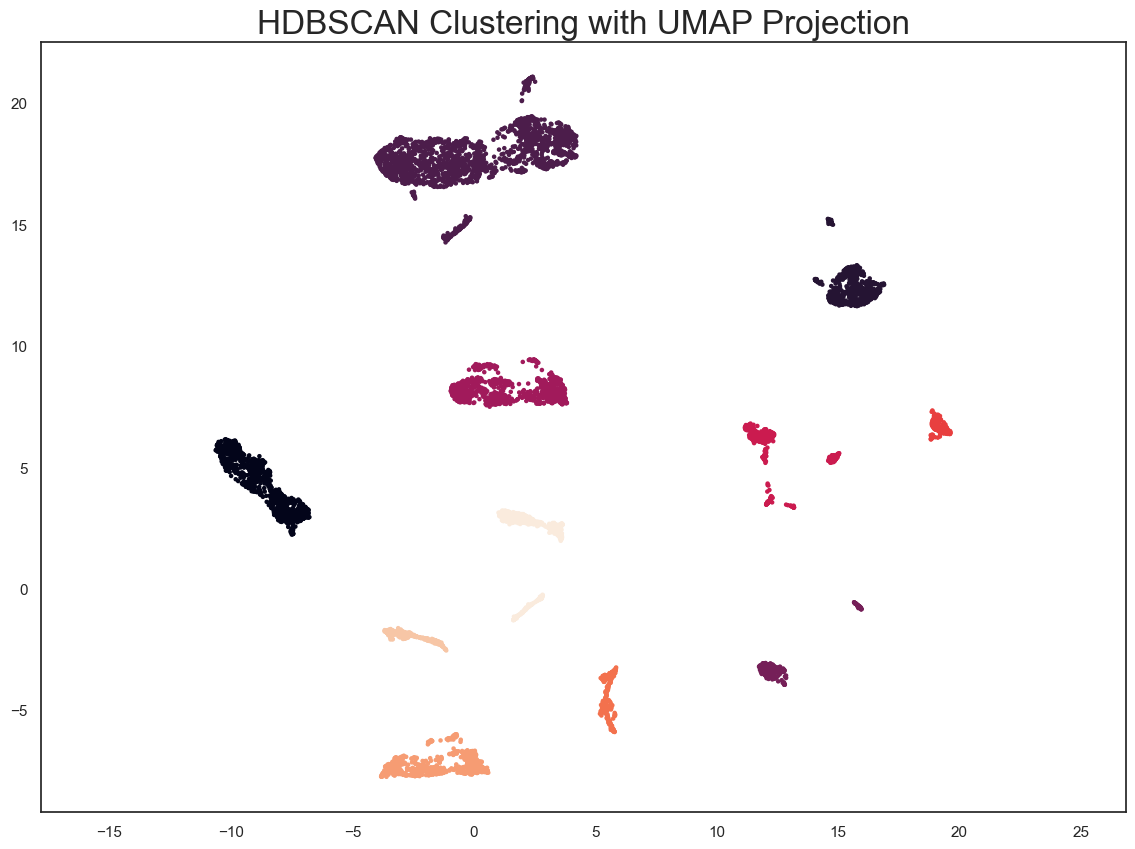

The average silhouette_score is : 0.72339714


In [7]:
from sklearn.metrics import silhouette_score

hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,  # Assign colors based on cluster labels using the colormap
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()

spending_data['cluster_label'].value_counts()

silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

### Implementing DBSCAN

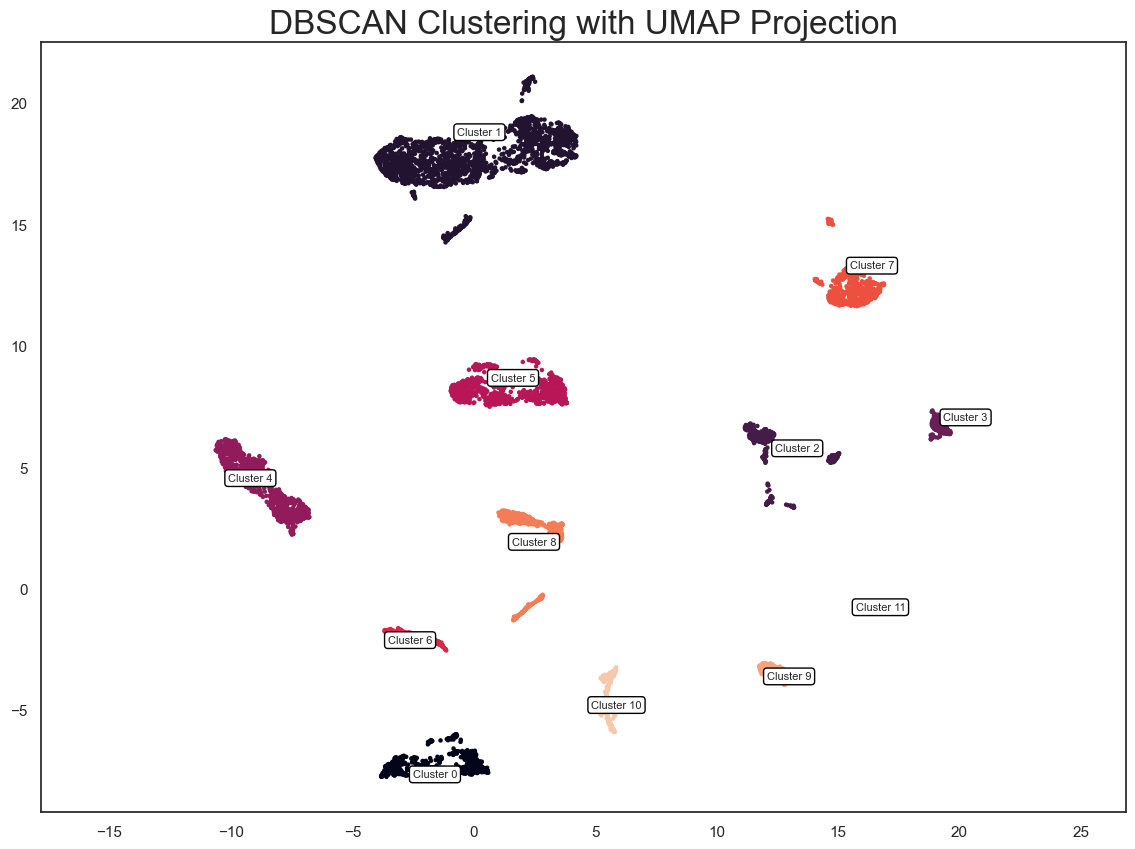

The average silhouette_score is : 0.7301992


In [61]:
from sklearn.metrics import silhouette_score

db = DBSCAN(min_samples=10, eps=2.5)

cluster_labels = db.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,  # Assign colors based on cluster labels using the colormap
)

for label in np.unique(cluster_labels):
    if label == -1:  # Label noise points separately
        continue
    cluster_center = np.mean(spending_umap[cluster_labels == label], axis=0)
    plt.annotate(
        f'Cluster {label}',
        xy=cluster_center,
        xytext=(cluster_center[0], cluster_center[1]),
        textcoords="offset points",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )

plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()
spending_data['cluster_label'].value_counts()


silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

#### Plotting accounts within UMAP clusters

In [74]:
cluster_of_interest = 11

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=6)

sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
Sender account,,,,,,,,,,,,,,,
40131.0,-0.004557,-0.085342,-0.012446,-0.041388,0.099398,0.062962,-0.051905,0.053960,-0.005193,-0.009759,0.076614,0.032314,-0.003582,-0.111078,11
73575.0,-0.003766,-0.089072,-0.012389,-0.041388,0.099709,0.062442,-0.056809,0.036702,-0.001932,-0.009759,0.083741,0.054222,-0.003582,-0.118117,11
50562.0,0.000616,-0.033058,-0.012838,-0.041388,0.059702,0.087411,-0.060625,-0.007146,-0.026542,-0.009759,0.096243,0.072869,-0.003582,-0.121903,11
21496.0,-0.000243,-0.057208,0.015206,-0.041388,0.043684,0.080664,-0.057317,-0.007146,0.025879,-0.009759,0.097684,0.025054,-0.002000,-0.113111,11
100159.0,-0.004557,-0.074589,0.006527,-0.037747,0.070397,0.055130,-0.005565,-0.007146,-0.012382,-0.009759,0.128353,0.037411,-0.003582,-0.142490,11
12060.0,0.000189,-0.093768,-0.011081,-0.027655,0.132356,0.056386,-0.009905,-0.007146,-0.023401,-0.009759,0.116577,0.020189,-0.003582,-0.139400,11


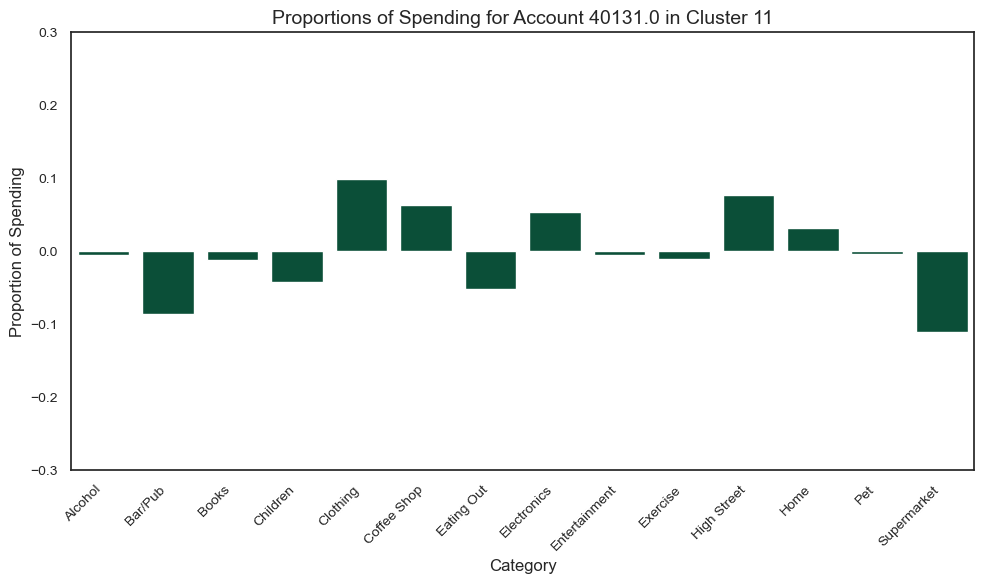

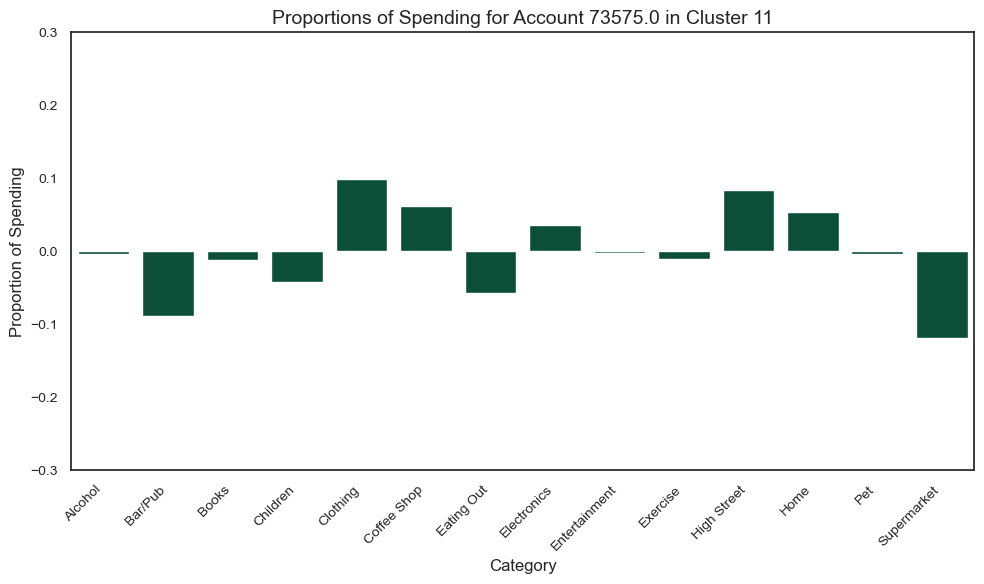

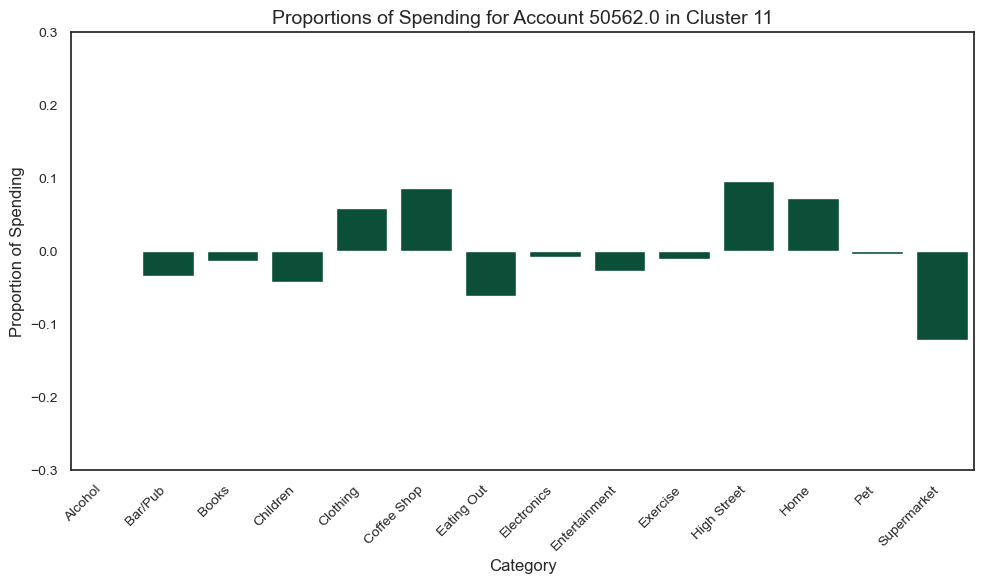

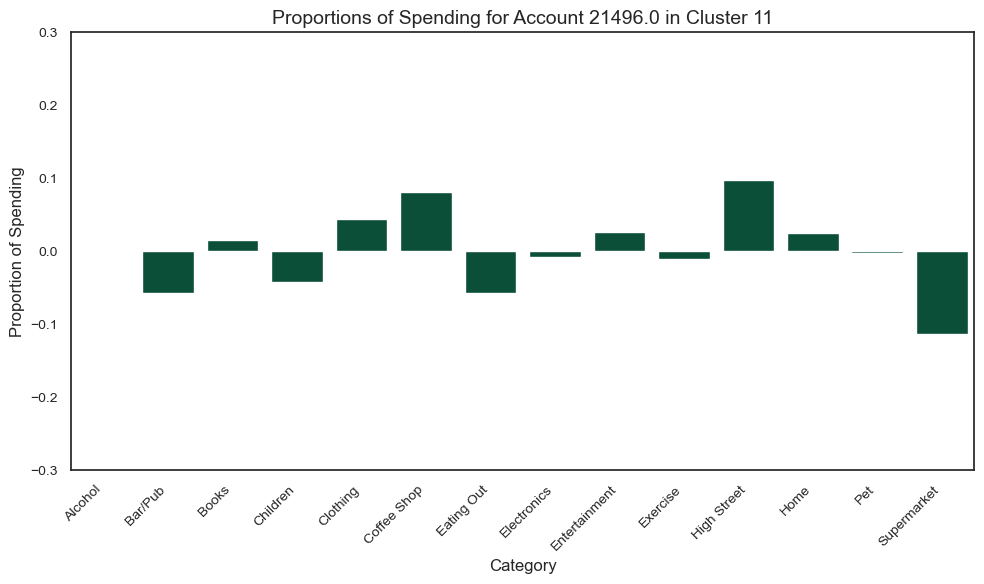

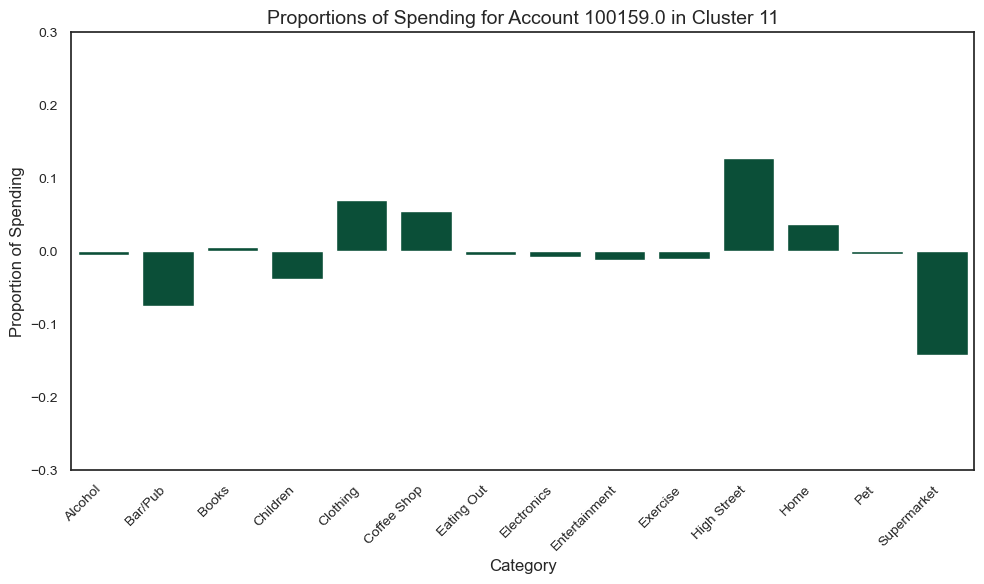

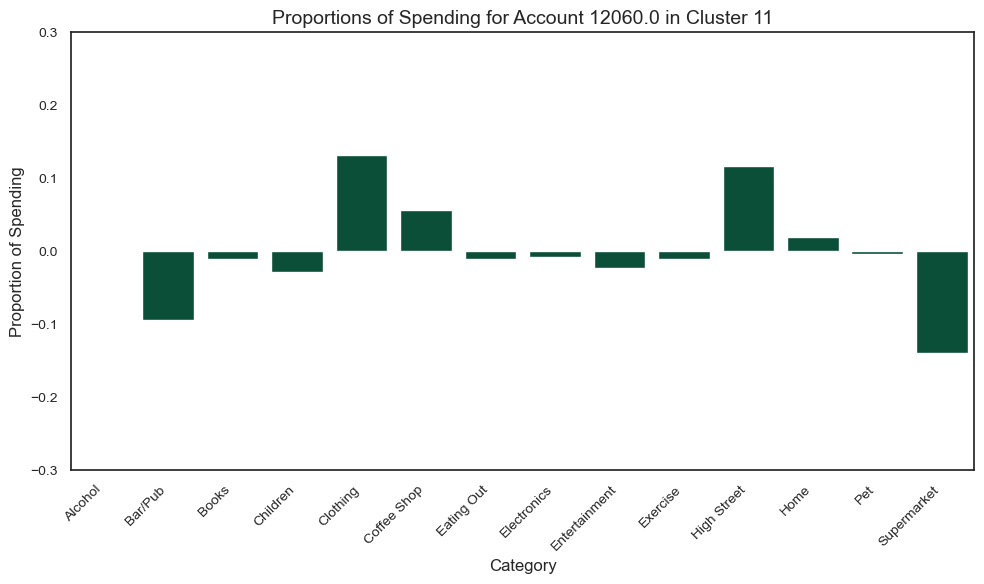

In [75]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-0.3, 0.3)
    plt.tight_layout()
    plt.show()

Labelling clusters with insights

In [ ]:
Cluster_names = [
    'High Coffee Low Clothing Low High-Street',
    'High Bar/Pub',
    'Low Supermarket High Highstreet High Children',
    'Low Supermarket High Highstreet',
    'High Clothing High Home',
    'High Children',
    'High Clothing High Coffeeshop',
    'Low Supermarket High Highstreet High Bar/Pub',
    'High Clothing High Children Low Bar/Pub',
    'Low Supermarket High Highstreet High Coffeshop',
    'High Children High Coffeeshop',
    'Low Supermarket High Highstreet High Coffeshop High Clothing'
]

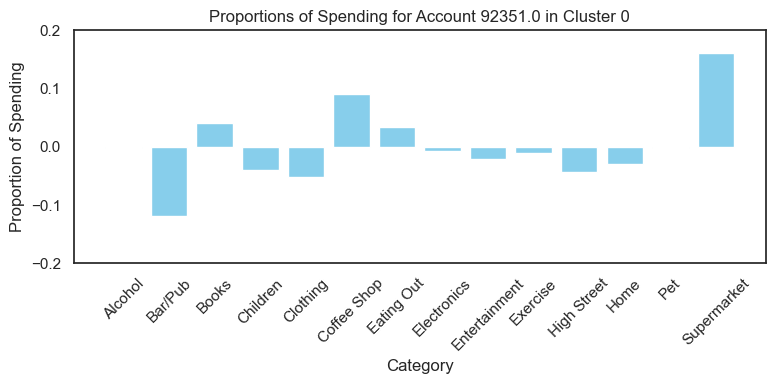

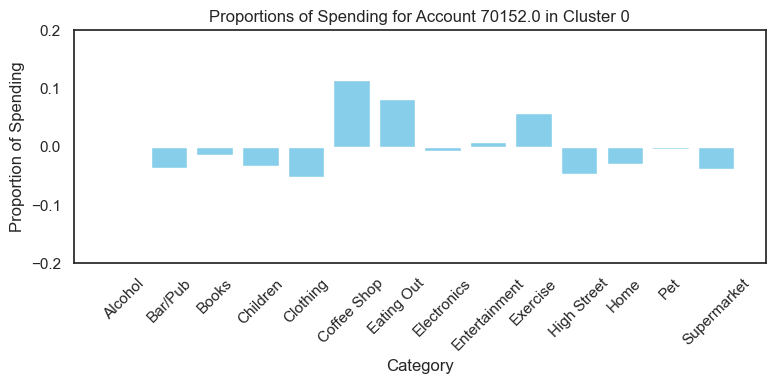

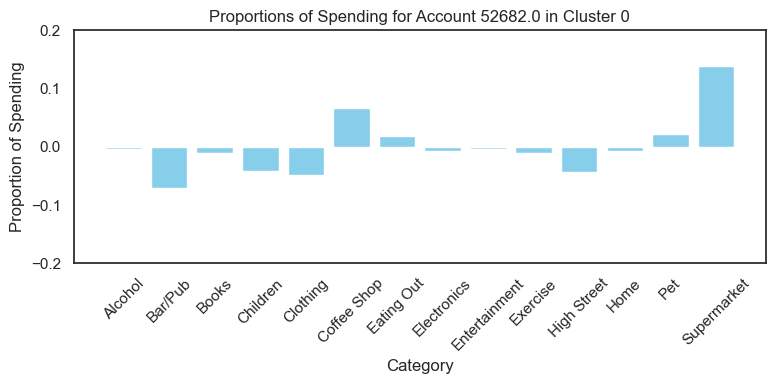

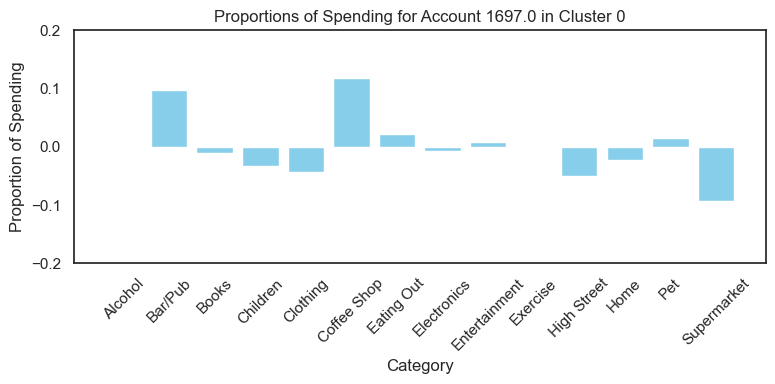

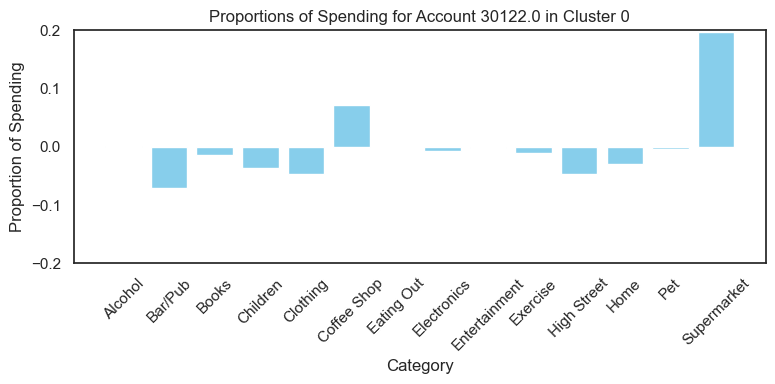

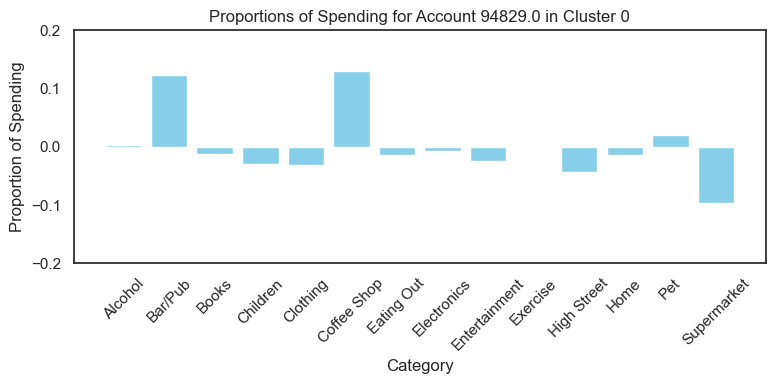

In [14]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.2, 0.2)
    plt.tight_layout()
    plt.show()

In [12]:
spending_data['Alcohol'].min()

-0.00455653712913

In [13]:
spending_data['cluster_label'].value_counts()

cluster_label
0     2326
2     1079
4     1002
7      722
1      712
5      528
9      457
8      423
10     322
3      314
6      257
Name: count, dtype: int64

#### Clustering without UMAP

In [26]:
hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(X)

spending_data['cluster_label'] = cluster_labels

In [6]:
spending_data['cluster_label'].unique()

array([ 0,  1, -1,  2,  3], dtype=int64)

Plotting the proportions for some of the accounts in a cluster

In [17]:
cluster_of_interest = 1

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=3)


In [18]:
sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
Sender account,,,,,,,,,,,,,,,
94358.0,-0.000747,-0.008759,0.018492,-0.037576,-0.048705,-0.027612,0.012461,-0.007146,0.006228,-0.009759,-0.049464,-0.022343,-0.003582,0.178512,1
92468.0,-0.003344,0.111188,0.040096,-0.029668,-0.015230,0.014609,0.006478,-0.007146,-0.026818,-0.009759,-0.047388,-0.030313,-0.003582,0.000877,1
66821.0,-0.003712,0.032756,-0.008229,-0.030917,-0.041415,-0.007324,-0.044276,-0.007146,0.001292,-0.009759,-0.042140,-0.026766,0.021583,0.166053,1


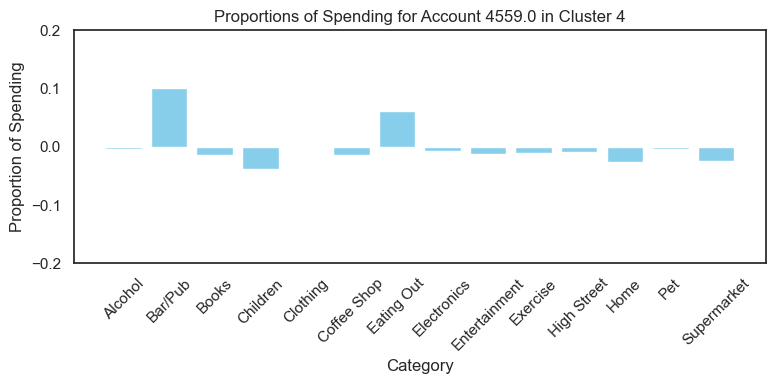

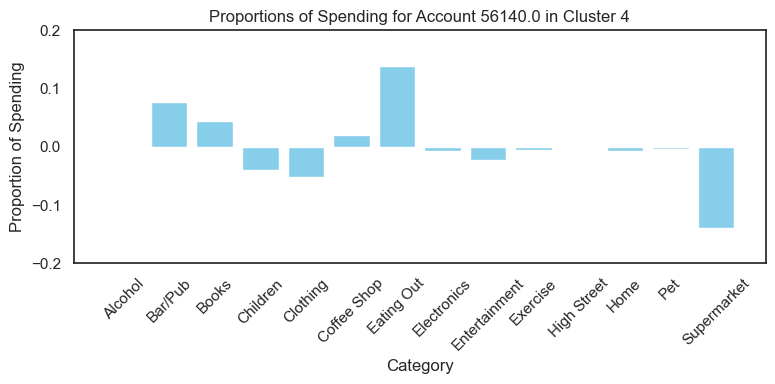

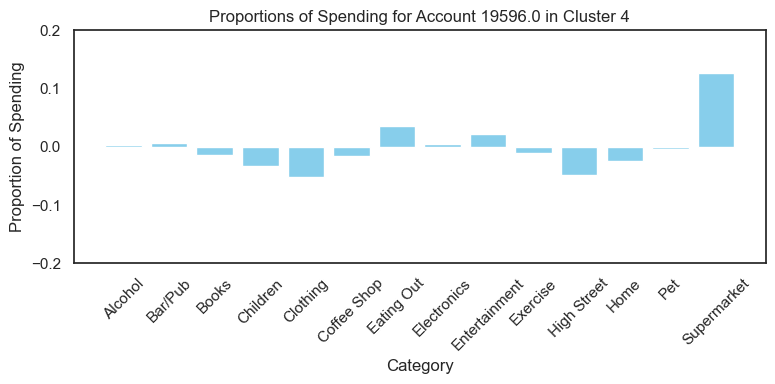

In [62]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.2, 0.2)
    plt.tight_layout()
    plt.show()

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

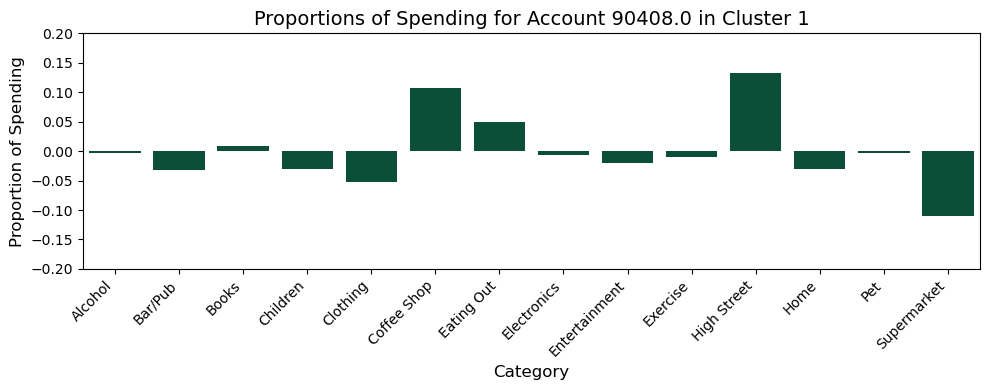

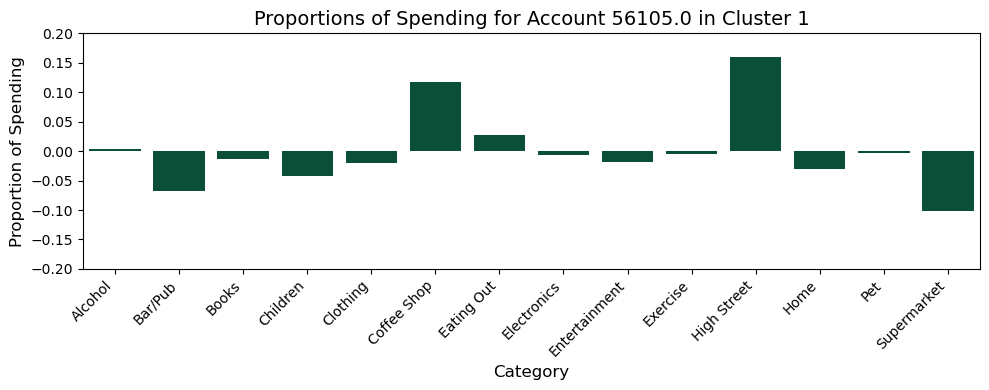

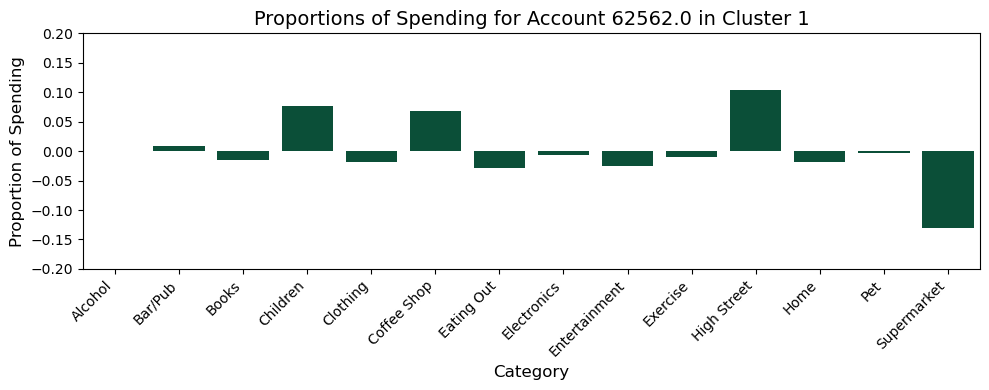

In [20]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-0.2, 0.2)  # Adjust y-axis limits if needed
    plt.tight_layout()
    plt.show()

In [26]:
spending_data['cluster_label'].value_counts()

cluster_label
 0    6292
 3     635
-1     533
 1     412
 2     270
Name: count, dtype: int64